<a href="https://colab.research.google.com/github/FilippMaksimov/Net.Statistics/blob/main/Stat_Maksimov_F_FinalLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1. EDA

In [ ]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

df = pd.read_csv('Global YouTube Statistics.csv', encoding='windows-1252')
df.head(10)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
5,6,Music,119000000,0.000000e+00,NaN,Music,0,NaN,NaN,Music,...,NaN,2013.0,Sep,24.0,NaN,NaN,NaN,NaN,NaN,NaN
6,7,ýýý Kids Diana Show,112000000,9.324704e+10,People & Blogs,ýýý Kids Diana Show,1111,United States,US,Entertainment,...,NaN,2015.0,May,12.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
7,8,PewDiePie,111000000,2.905804e+10,Gaming,PewDiePie,4716,Japan,JP,Entertainment,...,NaN,2010.0,Apr,29.0,63.2,1.262266e+08,2.29,115782416.0,36.204824,138.252924
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,Vlad and Niki,574,United States,US,Entertainment,...,600000.0,2018.0,Apr,23.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891


In [ ]:
#Обработка пропущенных значений
print((df.isna().mean() * 100).round(2))
filled_data = df.copy()

rank                                        0.00
Youtuber                                    0.00
subscribers                                 0.00
video views                                 0.00
category                                    4.62
Title                                       0.00
uploads                                     0.00
Country                                    12.26
Abbreviation                               12.26
channel_type                                3.02
video_views_rank                            0.10
country_rank                               11.66
channel_type_rank                           3.32
video_views_for_the_last_30_days            5.63
lowest_monthly_earnings                     0.00
highest_monthly_earnings                    0.00
lowest_yearly_earnings                      0.00
highest_yearly_earnings                     0.00
subscribers_for_last_30_days               33.87
created_year                                0.50
created_month       

In [ ]:
#video_views_rank является своего рода нумерацией по просмотрам. Поэтому можно попробовать применить след шаги
filled_data_sorted = filled_data.sort_values(by='video views', ascending=False).reset_index()
filled_data_sorted['video_views_rank'] = filled_data_sorted.index + 1.0
filled_data_sorted.set_index('index', inplace=True)
filled_data['video_views_rank'] = filled_data_sorted['video_views_rank']
#Оставим те стобцы, где в строках хотя бы 15 значений будут заполнены
filled_data.dropna(thresh=15, inplace=True)

#категория относится к качественному показателю, поэтому заолнение будет по моде
#также можно предположить, что категории могут быть связаны с типом канала
#также нужно заполнить пустые данные в типе канала по моде
#аналогично с country, country_rank и abbreviation соответственно
filled_data['category'] = filled_data['category'].fillna(filled_data.groupby('channel_type')['category'].transform(lambda x: x.mode()[0]))
filled_data['channel_type'] = filled_data['channel_type'].fillna(filled_data.groupby('category')['channel_type'].transform(lambda x: x.mode()[0]))
filled_data['channel_type'] = filled_data['channel_type'].fillna(filled_data.groupby('channel_type_rank')['channel_type'].transform(lambda x: x.mode()[0]))
filled_data['channel_type_rank'] = filled_data['channel_type_rank'].fillna(filled_data.groupby('channel_type')['channel_type_rank'].transform(lambda x: x.mode()[0]))
filled_data['Country'] = filled_data['Country'].fillna(filled_data.groupby('category')['Country'].transform(lambda x: x.mode()[0]))
filled_data['country_rank'] = filled_data['country_rank'].fillna(filled_data.groupby('Country')['country_rank'].transform(lambda x: x.mode()[0]))
filled_data['Abbreviation'] = filled_data['Abbreviation'].fillna(filled_data.groupby('Country')['Abbreviation'].transform(lambda x: x.mode()[0]))

#video_views_for_the_last_30_days и subscribers_for_last_30_days являются непрерывными величинами.
#Также можно предположить, что оба стобца взаимосвязаны с channel_type .
#Следовательно можно попробовать заполнить пропуски по среднему значению с группировкой по channel_type
filled_data['video_views_for_the_last_30_days'] = filled_data['video_views_for_the_last_30_days'].fillna(filled_data.groupby('channel_type')['video_views_for_the_last_30_days'].transform('mean')).round(0)
filled_data['subscribers_for_last_30_days'] = filled_data['subscribers_for_last_30_days'].fillna(filled_data.groupby('channel_type')['subscribers_for_last_30_days'].transform('mean')).round(0)

#Также пропуски в столбцах created_year, created_month, created_date невелики.
#Также эти данные являются категориальными.
#Поэтому можно заполнить пропущенные значения по данным столбцам модой
filled_data['created_year'] = filled_data['created_year'].fillna(filled_data['created_year'].mode()[0])
filled_data['created_month'] = filled_data['created_month'].fillna(filled_data['created_month'].mode()[0])
filled_data['created_date'] = filled_data['created_date'].fillna(filled_data['created_date'].mode()[0])

filled_data['Gross tertiary education enrollment (%)'] = filled_data['Gross tertiary education enrollment (%)'].fillna(filled_data.groupby('Country')['Gross tertiary education enrollment (%)'].transform('median'))
filled_data['Population'] = filled_data['Population'].fillna(filled_data.groupby('Country')['Population'].transform('median'))
filled_data['Unemployment rate'] = filled_data['Unemployment rate'].fillna(filled_data.groupby('Country')['Unemployment rate'].transform('median'))
filled_data['Urban_population'] = filled_data['Urban_population'].fillna(filled_data.groupby('Country')['Urban_population'].transform('median'))
filled_data['Latitude'] = filled_data['Latitude'].fillna(filled_data.groupby('Country')['Latitude'].transform('median'))
filled_data['Longitude'] = filled_data['Longitude'].fillna(filled_data.groupby('Country')['Longitude'].transform('median'))

#Оставшиеся незначительные пропуски можно заполнить модой
filled_data['Gross tertiary education enrollment (%)'] = filled_data['Gross tertiary education enrollment (%)'].fillna(filled_data['Gross tertiary education enrollment (%)'].mode()[0])
filled_data['Population'] = filled_data['Population'].fillna(filled_data['Population'].mode()[0])
filled_data['Unemployment rate'] = filled_data['Unemployment rate'].fillna(filled_data['Unemployment rate'].mode()[0])
filled_data['Urban_population'] = filled_data['Urban_population'].fillna(filled_data['Urban_population'].mode()[0])
filled_data['Latitude'] = filled_data['Latitude'].fillna(filled_data['Latitude'].mode()[0])
filled_data['Longitude'] = filled_data['Longitude'].fillna(filled_data['Longitude'].mode()[0])

print((filled_data.isna().mean() * 100).round(2))


rank                                       0.0
Youtuber                                   0.0
subscribers                                0.0
video views                                0.0
category                                   0.0
Title                                      0.0
uploads                                    0.0
Country                                    0.0
Abbreviation                               0.0
channel_type                               0.0
video_views_rank                           0.0
country_rank                               0.0
channel_type_rank                          0.0
video_views_for_the_last_30_days           0.0
lowest_monthly_earnings                    0.0
highest_monthly_earnings                   0.0
lowest_yearly_earnings                     0.0
highest_yearly_earnings                    0.0
subscribers_for_last_30_days               0.0
created_year                               0.0
created_month                              0.0
created_date 

In [ ]:
#Большая часть пропусков была по столбцу subscribers_for_last_30_days
#Для чего было принято решение сравнить основные статистики до и после заполнения пропусков
print('BEFORE')
print(df['subscribers_for_last_30_days'].describe() / 1000)
print('-------------------------------------')
print('AFTER')
print(filled_data['subscribers_for_last_30_days'].describe() / 1000)

BEFORE
count       0.658000
mean      349.079132
std       614.355441
min         0.001000
25%       100.000000
50%       200.000000
75%       400.000000
max      8000.000000
Name: subscribers_for_last_30_days, dtype: float64
-------------------------------------
AFTER
count       0.990000
mean      347.747164
std       504.632481
min         0.001000
25%       100.000000
50%       212.577000
75%       440.865000
max      8000.000000
Name: subscribers_for_last_30_days, dtype: float64


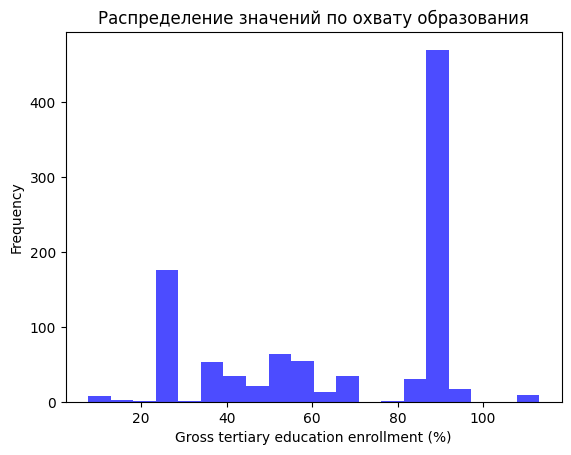

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
191,192,Bounce Patrol - Kids Songs,27800000,2.103785e+10,Music,Bounce Patrol - Kids Songs,292,Australia,AU,Music,...,212577.0,2013.0,Jan,1.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
247,248,Chloe Ting,24700000,2.994726e+09,Howto & Style,Chloe Ting,412,Australia,AU,Howto,...,211111.0,2011.0,Aug,17.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
373,374,LazarBeam,20500000,8.768697e+09,Gaming,LazarBeam,1323,Australia,AU,Games,...,291912.0,2015.0,Jan,4.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
478,479,How Ridiculous,18000000,9.601137e+09,Sports,How Ridiculous,650,Australia,AU,Sports,...,600000.0,2009.0,Sep,9.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
508,509,The Game Theorists,17600000,3.752347e+09,Gaming,TheGameTheorists,0,Australia,AU,Games,...,291912.0,2014.0,Jan,9.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
522,523,HowToBasic,17300000,3.684816e+09,Howto & Style,HowToBasic,582,Australia,AU,Howto,...,211111.0,2011.0,Dec,8.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
526,527,Jason Vlogs,17200000,8.903647e+09,Education,Jason Oo,83,Australia,AU,People,...,481614.0,2014.0,Sep,11.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
706,707,Lachlan,14800000,5.269059e+09,Gaming,Lachlan,3834,Australia,AU,Games,...,291912.0,2013.0,Mar,19.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136
785,786,Trap City,14100000,5.129530e+09,Music,TrapCity,3,Australia,AU,People,...,1.0,2015.0,Nov,4.0,113.1,25766605.0,5.27,21844756.0,-25.274398,133.775136


In [ ]:
#Анализ распределения перменных охвата образования
mp.hist(filled_data['Gross tertiary education enrollment (%)'], bins=20, color='blue', alpha=0.7)
mp.xlabel('Gross tertiary education enrollment (%)')
mp.ylabel('Frequency')
mp.title('Распределение значений по охвату образования')
mp.show()

#Исходя из гистограммы мы нашли значения, превышающие 100. Возможно это ошибка в данных
filled_data[(filled_data['Gross tertiary education enrollment (%)'] > 100)]

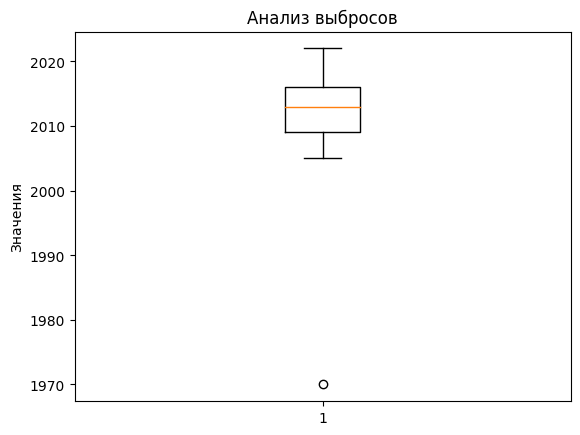

1970.0
1970.0


In [ ]:
#Анализ выбросов и анималий по годам
mp.boxplot(filled_data['created_year'])
mp.ylabel('Значения')
mp.title('Анализ выбросов')
mp.show()

#Год создания канала не мб 1970 годом
print(filled_data['created_year'].min())

#Для наглядности код с удалением аномалии закомментирован в целях наглядного отображения выброса
#filled_data = filled_data.drop(filled_data[filled_data['created_year'] == 1970].index)
#Повторно проверяем минимальный год
print(filled_data['created_year'].min())

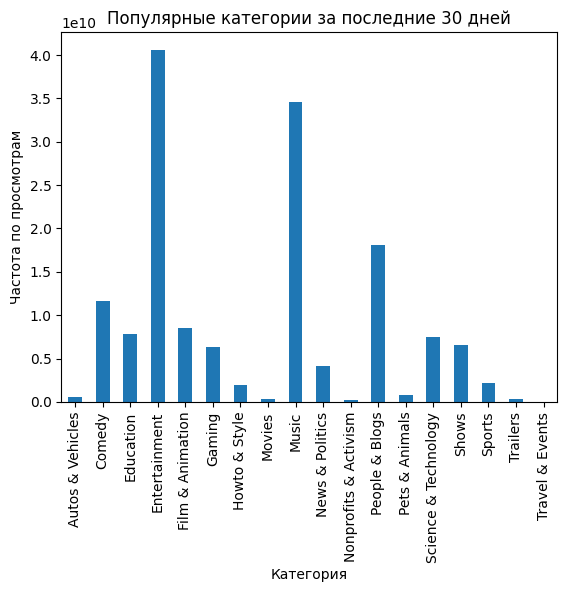

In [ ]:
#Самые популярные категории в ютуб за последний месяц
#График просмотров для каждой категории
views_gr = df.groupby('category').sum()['video_views_for_the_last_30_days']
views_gr.plot(kind='bar')
mp.xlabel('Категория')
mp.ylabel('Частота по просмотрам')
mp.title('Популярные категории за последние 30 дней')
mp.show()

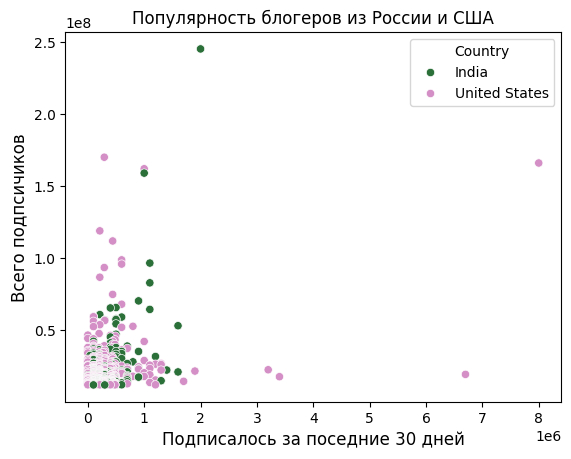

In [ ]:
#Популярность (рост подписчиков) у блогеров в США и Индии
#Двумерный анализ

mp.title('Популярность блогеров из России и США')
mp.xlabel('Подписалось за поседние 30 дней', size=12)
mp.ylabel('Всего подпсичиков', size=12)

data_s = filled_data[['rank','Country', 'subscribers', 'subscribers_for_last_30_days']]
data_s = data_s[((data_s['Country'] == 'India') | (data_s['Country'] == 'United States'))]
sb.scatterplot(data=data_s, x='subscribers_for_last_30_days', y='subscribers', hue='Country', palette='cubehelix')
mp.show()

#Исходя из анализа, можно сделать вывод, что наиболее активный рост подписчиков на старте  наблюдается в основном у блогеров из Индии.

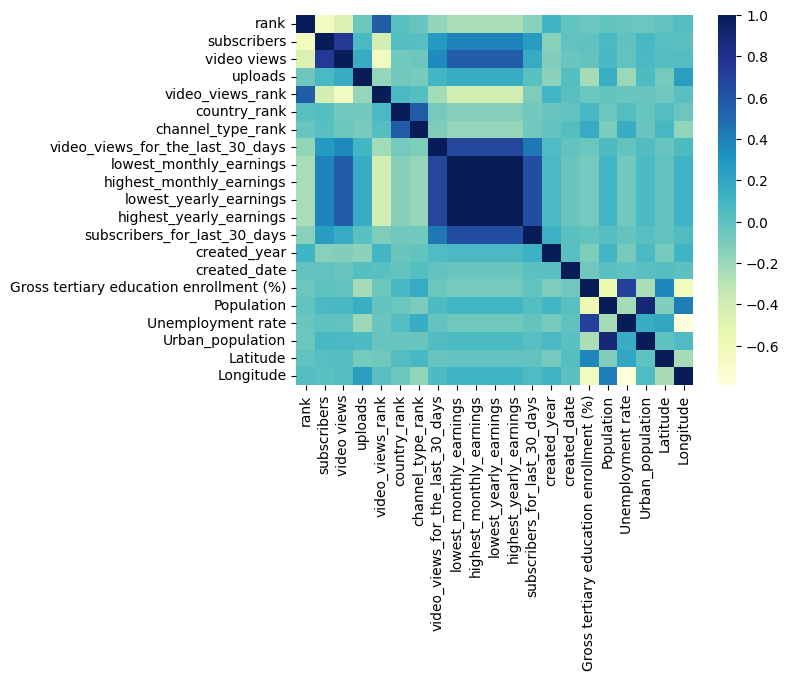

In [ ]:
#матрица кореляций
dataplot = filled_data.loc[:, ~filled_data.columns.isin(['Youtuber', 'category', 'Title', 'Country', 'Abbreviation', 'channel_type', 'created_month'])]
dm = sb.heatmap(dataplot.corr(), cmap='YlGnBu')
mp.show()

In [ ]:
correlation = filled_data['subscribers'].corr(filled_data['video views'])
print("Корреляция между подписчиками и количеством просмотров:", correlation)

Корреляция между подписчиками и количеством просмотров: 0.7519712204816373


Задание 2

In [ ]:
cor_data = filled_data[['subscribers', 'video views']]
cor_data.drop(cor_data[cor_data['video views'] == 0].index, inplace=True)

<ipython-input-600-24f222c99f5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor_data.drop(cor_data[cor_data['video views'] == 0].index, inplace=True)


In [ ]:
#коэффициент корреляции Пирсона
def covariance(x, y):
  dx = x - x.mean()
  dy = y - y.mean()
  return (dx * dy).sum() / (dx.count() - 1)

def stdev(column):
  diff = 0
  avg = sum(column) / len(column)
  for row in column:
    diff += (row-avg) ** (2)
  return (diff/(len(column) - 1)) ** (0.5)

r = covariance(cor_data['subscribers'], cor_data['video views']) / (stdev(cor_data['subscribers'] * stdev(cor_data['video views'])))
print(r)

#значение стремится к 1, что говорит о сильной положительной корреляции. При изменении одного значения, изменится другое в том же направлении

0.8242493966843232


In [ ]:
#Тк распределение данных далеко от нормально, то можно применить коэффициент корреляции Спирмана
corr_sp = filled_data[['video views', 'subscribers']].corr(method='spearman').iloc[0, 1]
corr_sp

0.5585202962661209

<Axes: xlabel='video views', ylabel='subscribers'>

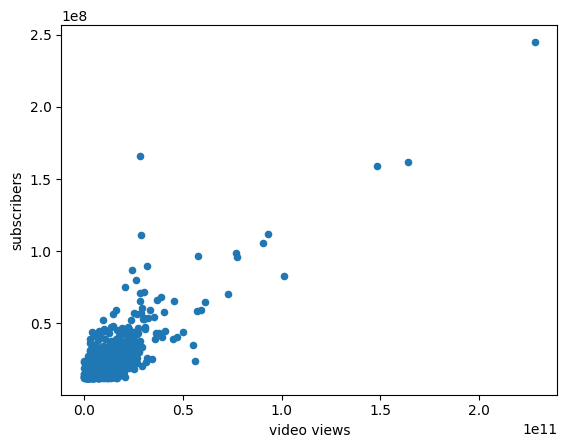

In [ ]:
cor_data.plot(kind='scatter', x='video views', y='subscribers')

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.model_selection import train_test_split

#Данные где video views = 0 убраны
x = cor_data['video views']
y = cor_data['subscribers']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
x_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_const)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:            subscribers   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1499.
Date:                Wed, 08 May 2024   Prob (F-statistic):          9.36e-175
Time:                        22:38:33   Log-Likelihood:                -12036.
No. Observations:                 688   AIC:                         2.408e+04
Df Residuals:                     686   BIC:                         2.409e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.186e+07   4.61e+05     25.722      

In [ ]:
#предсказанные значения
y_pred = res.predict(x_const)
y_pred

406    1.496818e+07
533    1.282378e+07
820    2.246159e+07
511    1.401116e+07
438    2.638545e+07
           ...     
111    6.495801e+07
277    1.391276e+07
871    1.458066e+07
443    1.691051e+07
107    2.732537e+07
Length: 688, dtype: float64

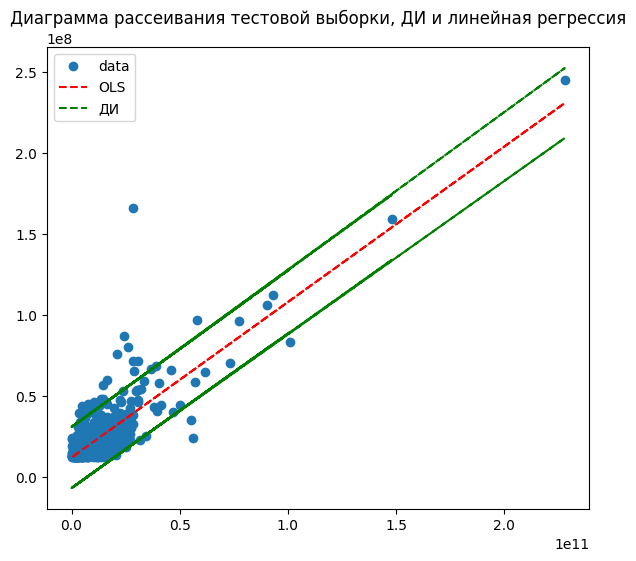

In [ ]:
#Построим диаграмму рассеивания тестовой выборки, доверительный интервал и линейную регрессию
prstd, iv_l, iv_u = wls_prediction_std(res)
fig, ax = mp.subplots(figsize=(7,6))
ax.plot(x_const.iloc[:, 1], y_train, 'o', label='data')
ax.plot(x_const.iloc[:, 1], res.fittedvalues, 'r--', label='OLS')
ax.plot(x_const.iloc[:, 1], iv_l, 'g--', label='ДИ')
ax.plot(x_const.iloc[:, 1], iv_u, 'g--')
ax.legend(loc='best')
mp.title('Диаграмма рассеивания тестовой выборки, ДИ и линейная регрессия')
mp.show()

In [ ]:
#Оценка точности
print('R2: ', res.rsquared)

R2:  0.6860854267478091


Text(0.5, 1.0, 'График остатков ')

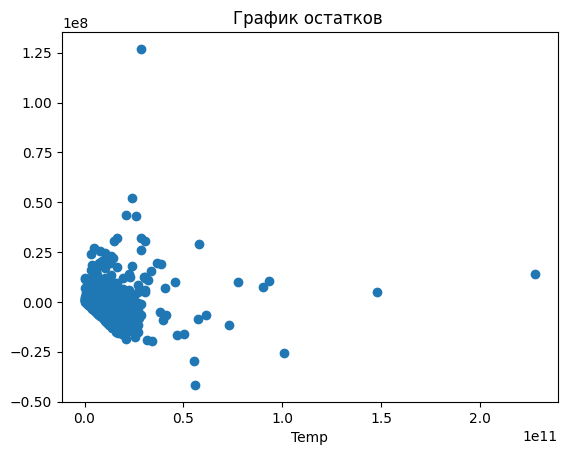

In [ ]:
mp.scatter(x_const.iloc[:, 1], res.resid)
mp.xlabel('Temp')
mp.title('График остатков ')

In [ ]:
#как отразится на значениях и точности, если не стирать нулевые значения?
cor_data_zero = filled_data[['subscribers', 'video views']]

x0 = cor_data_zero['video views']
y0 = cor_data_zero['subscribers']

x0_train, x0_test, y0_train, y0_test = train_test_split(x0, y0, test_size=0.30, random_state=42)
x0_const = sm.add_constant(x0_train)
model0 = sm.OLS(y0_train, x0_const)
res0 = model0.fit()
print(res0.summary())

                            OLS Regression Results                            
Dep. Variable:            subscribers   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     1202.
Date:                Wed, 08 May 2024   Prob (F-statistic):          2.50e-153
Time:                        22:39:00   Log-Likelihood:                -12213.
No. Observations:                 693   AIC:                         2.443e+04
Df Residuals:                     691   BIC:                         2.444e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.263e+07   5.13e+05     24.630      

In [ ]:
#Оценка точности
print('R2: ', res0.rsquared)
#Точность упала почти на 5 процентов

R2:  0.6348899690876264


Text(0.5, 1.0, 'График остатков ')

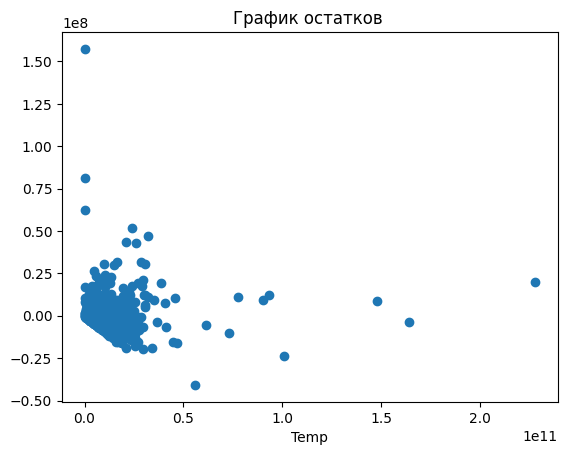

In [ ]:
mp.scatter(x0_const.iloc[:, 1], res0.resid)
mp.xlabel('Temp')
mp.title('График остатков ')

Задание 3

In [ ]:
#Опередление топ-2 категорий
top_cat = filled_data.groupby('category')['rank'].count().sort_values(ascending=False).to_dict()
top_two = []
for key in top_cat.keys():
  if len(top_two) == 2:
    break
  else:
    top_two.append(key)
top_two

['Entertainment', 'Music']

In [ ]:
#Фильрация по категориям, где количество просмотров не равно 0.
df3 = filled_data[['category', 'video views', 'subscribers', 'uploads']]
df3 = df3[(df3['category'].isin(top_two)) & (df3['video views'] != 0)]
data3 = df3.loc[:, df3.columns!= 'category']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df3['category'])
le.classes_

array(['Entertainment', 'Music'], dtype=object)

In [ ]:
#Кодирование категорий на 0 и 1
data_class = le.transform(df3['category'])
data_class

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data3, data_class, test_size=0.3, random_state=13)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
#Прогноз на тестовой выборке и расчет точности
y_pred = logreg.predict(x_test)
print('Точность: {:.2f}'.format(logreg.score(x_test, y_test)))

Точность: 0.61


,video views,subscribers,uploads
511,2.238134e+09,17500000,709
749,4.315486e+09,14500000,176
53,2.138873e+10,45500000,4660
568,9.463244e+09,16400000,56203
692,8.932038e+09,15000000,3168
...,...,...,...
781,3.317806e+09,14200000,1724
820,1.103934e+10,13800000,4978
915,3.643699e+09,12900000,1598
471,1.337836e+10,18100000,420


<Axes: xlabel='video views'>

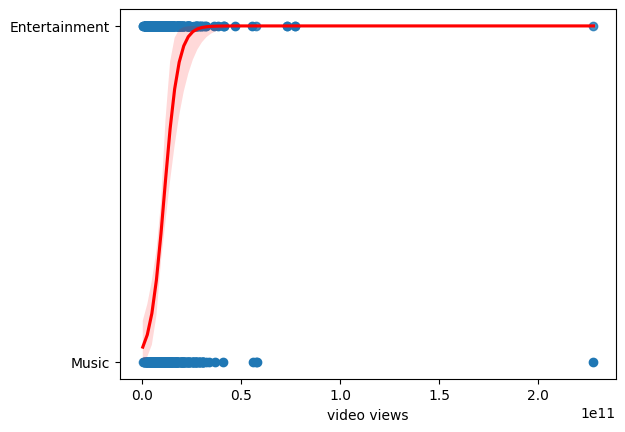

In [ ]:
mp.scatter(df3['video views'], df3['category'])
sb.regplot(x=x_test['video views'], y=y_pred, logistic=True, line_kws={'color':'red'})

In [ ]:
#Изменится ли точность модели, если в качестве признаков выбрать другие столбцы?
df3 = filled_data[['category', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']]
df3 = df3[(df3['category'].isin(top_two))]
data3 = df3.loc[:, df3.columns!= 'category']

In [ ]:
le = LabelEncoder()
le.fit(df3['category'])
data_class = le.transform(df3['category'])
data_class

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data3, data_class, test_size=0.3, random_state=13)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = logreg.predict(x_test)
print('Точность: {:.2f}'.format(logreg.score(x_test, y_test)))

#С использованием стобцов 'video_views_for_the_last_30_days' и 'subscribers_for_last_30_days'
#точность уменьшилась на 8 процентов.

Точность: 0.53
